 # 第 6 章 混合模型

 <style>p{text-indent:2em;2}</style>

混合已有元素是创造新东西的一种方式。在统计学中，混合模型是一种常用的建模方法。这些模型通过混合更简单的分布来获得复杂分布。例如，可以组合两个高斯分布来描述双峰分布，或者组合多个高斯分布来描述任意分布。虽然使用高斯分布很常见，但原则上可以混合任何想要的分布族。混合模型用于不同的目的，例如直接对组分建模，或者作为处理复杂分布（特别是不能用更简单分布描述的复杂分布）的有用技巧。

 本章将学习以下内容：

- `有限混合模型`
- `无限混合模型`
- `连续混合模型`

---

## 6.1 混合模型

 当总体是不同的组分的组合时，混合模型自然会出现。一个典型案例是给定成年人口的身高分布，这可以被描述为女性和男性两个亚群的混合。手写数字图像像素值的分布是一个更复杂的例子，在该问题范畴内，预期存在 10 个亚群非常合理，至少在 10 进制系统中如此！如果我们已经知道了每个观测数据属于哪个组分，那么单独为每个组分建模是一个好主意。但当无法获得组分数量信息时，构建一个能够同时对多组分建模的新模型就派上了用场，这种新模型就是混合模型。

```{tip}
许多数据集不能用基础的概率分布来准确描述，但可以被描述为若干个基础概率分布的混合。这种假设数据来自混合分布的模型称为混合模型。
```

当建立一个混合模型时，并不一定要相信我们在数据中描述的是真实的子种群。混合模型作为一个统计技巧，可以为我们的工具箱增加灵活性。以高斯分布为例，可以用其作为许多单峰分布和对称分布的近似。但当存在多峰或不对称分布时该怎么办呢？能继续使用高斯分布来近似吗？答案是肯定的：如果使用`高斯混合模型（Guassian Mixture Model, GMM）`的话可以。

在高斯混合模型中，每个组分都是具有各自均值和标准差的高斯分布。通过组合多个高斯分布，可以为模型增加灵活性，适应更复杂的数据分布。**事实上，可以通过适当的高斯组合来近似任何我们想要的分布。** 所需高斯分布的确切数量取决于近似的准确性要求。事实上，本书许多章节中都在运用混合高斯分布的思想。例如：核密度估计（ `KDE` ）技巧是混合高斯思想的非贝叶斯（和非参数）实现，它假设所有数据点均来自于不同的高斯组分，这些高斯组分的方差相等，而数据点正好位于高斯的峰值处，然后对所有单独的高斯组分进行求和，以近似数据的完整分布。

```{note}
提示：核密度估计（ KDE ）假设每个数据点对应一个高斯组分，因此可视为一个具有 $N$ 个高斯组分的混合模型，$N$ 为数据点的数量。
```

下图展示了一个实际示例，说明了如何混合八个高斯分布来表达一个复杂分布，就像一条蟒蛇在消化一头大象。图中所有高斯都有相同方差，并且以橙色圆点为中心，这些圆点表示来自总体的样本点。如果仔细看图，你会注意到，临近数据点对应的高斯基本是一个叠加在另一个之上：

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505172616_90.webp)
图 6.1 一个 8 组分高斯混合的例子
</center>

 无论出于组分分析还是数学上的便利，混合模型都是一种很有用的方式，通过混合多个分布来描述数据，从而增加模型的灵活性。

## 6.2 有限混合模型

建立混合模型的一种方法是考虑两个（含两个）以上有限分布的加权混合。这就是 `有限混合模型（Finite mixture models）` 。此时，观测数据的概率密度是所有子群组概率密度的加权和：

```{math}
p(y \mid \theta)=\sum_{i=1}^{K} w_{i} p_{i}\left(y \mid \theta_{i}\right) \tag{式6.1} \label{式6.1}
```

此处 $w_i$ 是每个组分（或类）的权重，可以将 $w_i$ 解释为组分 $i$ 的概率，因此 $w_i$ 的值域为区间 [0，1] ，并且 $\sum_{i}^{K} w_{i}=1$ 。

这些组分的概率密度 $p_i(y|\theta_i)$ 实际上可以是任何我们认为有用的分布，从简单的高斯（或泊松）到更复杂的分层模型（或神经网络）。根据定义，当各组分的概率密度都是高斯分布时，这个有限混合模型就是高斯混合模型。

有限混合模型中的 $K$ 是一个有限的数字，而且通常比较小。为拟合有限混合模型，需要人工提供 $K$ 值，不管是事先确实已知，还是有根据地猜测。当然， $K$ 值无法确切已知时，自然会带来如何确定最佳 $K$ 值的问题，这个问题会在`第 6.2.4 节`讨论。

从概念上讲，求解混合模型需要做的就是将每个数据点适当地分配给其中一个组分，而后依据分配后的数据点，对各组分的概率密度建模。在概率模型中，可通过引入随机变量  $z$ 来实现这一点，该变量将指示特定观测被分配给了哪个组分。这样的变量通常被称为『隐变量』，之所以称为 “隐” 是因为这些变量值无法直接被观测到。

现在使用`第 2 章『概率编程』`中的化学漂移数据集来构建有限混合模型：

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

az.style.use('arviz-darkgrid')

([], <a list of 0 Text major ticklabel objects>)

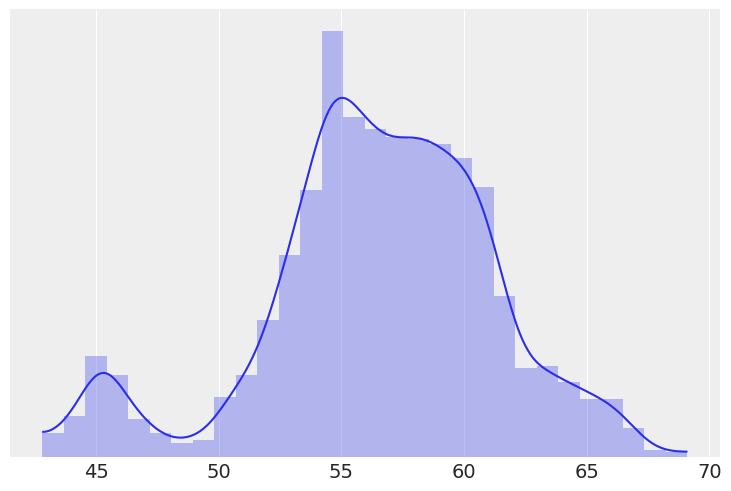

In [2]:
cs = pd.read_csv('../data/chemical_shifts_theo_exp.csv')
cs_exp = cs['exp']
az.plot_kde(cs_exp)
plt.hist(cs_exp, density=True, bins=30, alpha=0.3)
plt.yticks([])

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505173831_56.webp" style="zoom:67%;" />

图 6.2 化学漂移数据的多峰表现
</center>

根据图示可以看出该数据无法使用单一的高斯分布准确描述，但通过两个、三个或四个高斯分布应该可以比较准确。事实上，该数据采集自大约 40 个组分，只是这些组分间有相当大的重叠，在图中很难分辨出来而已。

此处可以继续抛硬币实验的建模思路，但高斯混合模型的不同之处在于：（1）现在有 $K$ 个结果（或组分），而不是 “正、反” 两个结果。（2）用于对二分类概率参数 $\theta$ 建模的贝塔分布，调整为适合多个分类的狄利克雷分布（注意：贝塔分布和狄利克雷分布均为连续型分布）；（3）适用于对二分类实验结果建模的伯努利分布，此处调整为面向多分类问题的类别分布；（4）抛硬币问题的可观测变量就是类别本身，而高斯混合模型的可观测变量是与类别有关的其他变量，而且这些变量在多个子群组中呈高斯分布。

```{note}
在之前的章节中，我们利用贝塔分布为 “正、反” 两个类别出现的概率（$\theta$、$1 - \theta$）设置了先验，利用伯努利分布为单次实验的结果变量 $y$ 设置了似然，并通过采样得出后验推断。类似的，高斯混合模型先用狄利克雷分布为不同组分的概率 $p$ 设置先验，用类别分布为单次实验的结果变量 $z$ 建模，而后用高斯分布对 $z$ 组分对应的可观测变量建模。
```

高斯混合模型的概念表达式如下：

\begin{align*}
\theta &\sim \operatorname{Direchlet}(\alpha)\\
z &\sim \operatorname{Categorical}(p=\theta)\\
\mu_{i} &\sim \mathcal{N}(\mu_{\mu_i},\sigma_{\mu})\\
\sigma &\sim \operatorname{Half-Cauchy}(\sigma_{\sigma})\\
y &\sim \mathcal{N}(\mu_{z},\sigma)
\end{align*}

注意：

（1）可观测变量 $y$ 的似然：均值为 $\mu_{z}$ 、方差为 $\sigma$ 的高斯分布，参数为：$组分均值\mu_{i},i=\{1,2,..,K\}、等方差\sigma、类别 z$。

（2）均值（ $\mu_{i}$ ）的先验为高斯分布。本模型并非分层模型，所以设置先验的均值 $\mu_{\mu_i}$ 为样本均值，设置方差 $\sigma_{\mu}$ 为常数。

（3）方差（ $\sigma$ ）为正值，先验设置为半柯西分布（或半高斯分布）。

（4）类别（ $z$ ）的先验设置为类别分布，其参数 $p$ 的超先验为狄利克雷分布。
### 6.2.1 类别分布

类别分布是最一般的离散分布，通过指定每个可能结果的概率来参数化。下图表示类别分布的两个实例，点表示类别分布的值，而线条辅助我们掌握分布的形状：

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505174816_08.webp" style="zoom:67%;" />

图 6.3 类别分布的示例，图中蓝色为一个三类别分布，橙色曲线为一个四类别分布。
</center>

### 6.2.2 狄利克雷分布

狄利克雷分布乍看可能有点奇怪，因为它是一种单纯形，有点像 $n$ 维的三角形：1 单纯形是一个线段；2 单纯形是一个三角形；3 单纯形是正四面体，以此类推。为什么是一个单纯形？直观上看，是因为该分布是一个长度为 $K$ 的向量，其中每个元素都为正数而且所有元素之和为 1。在理解为何狄利克雷分布是贝塔分布的一般形式前，先回顾下贝塔分布的特性。前面用贝塔分布来描述二分类问题，其中之一的概率为 $p$ ，另一个概率为 $1-p$ ，因而可以认为贝塔分布返回长度为 2 的向量 $[p, 1- p]$ 。当然，实践中通常忽略 $1-p$ ，因为通过 $p$ 完全可以定义。此外贝塔分布也可以通过两个标量 $α$ 和 $β$ 来定义。

这些参数如何类比到狄利克雷分布中呢？先考虑最简单的狄利克雷分布，即 3 分类问题建模。此时狄利克雷分布返回一个长度为 3 的向量 $[p, q, r ]$，其中 $r = 1 − (p + q)$ 。也可以用 3 个标量来描述狄利克雷分布，称为 $α$、$β$ 和 $γ$ ，不过不便于推广到高维情形，所以统一使用长度为 $K$ 的向量 $\mathbf{\alpha}$ 来描述，其中 $K$ 对应组分数量（可能出现的结果类型数量）。

可将贝塔分布和狄利克雷分布想象成某种比率的分布，为更直观地理解，下图将不同参数对应的狄利克雷分布画出来，留意图中每个三角形与参数相近的贝塔分布之间的联系。其中：

（1）$\mathbf{\alpha}$ 值越大，说明分布越紧致，$\alpha$ 越小，说明分布越弥散。当 $\alpha \to \infty$ 时，狄利克雷分布逐步趋近于连续分布，因此 $\mathbf{\alpha}$ 也被称为聚集参数。

（2） $\alpha$ 各维度的值越接近，分布越趋于中心化。

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505175717_a9.webp)

图 6.4
</center>

现在对狄利克雷分布有了了解，就可以进一步掌握学习混合模型的知识。构建混合模型的一种可视化方法是将其看作是基于高斯估计模型的 $K$ 面抛硬币问题，或 $K$ 面掷骰子问题。用 `Kruschke 图`可以将模型画成如下形式。

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505175913_df.webp" style="zoom:67%;" />

图 6.5
</center>

途中圆角矩形框表示我们有 $K$ 个高斯似然（以及对应的先验），类别变量决定具体使用哪个类别来描述数据。 记住，假设已知这些高斯分布的均值和标准差；只需将每个点赋给一个高斯分布即可。

该模型（假设 `clusters=2` ）可以用 `PyMC3` 实现为：

In [3]:
clusters=2

with pm.Model() as model_kg:
    # 先验p： 服从狄拉克雷分布
    p = pm.Dirichlet ('p', a=np.ones(clusters))
    # 隐变量z： 是来自 p 的一次多类别抽样
    z = pm.Categorical('z', p=p, shape=len(cs_exp))
    # 各组分分别服从各自（均值，标准差为10）的高斯分布
    means = pm.Normal('means', mu=cs_exp.mean(), sd=10, shape=clusters)
    # 均值服从半正态分布
    sd = pm.HalfNormal('sd', sd=10)

    # y 服从（多组分加权的平均值，sd=10）的高斯分布
    y = pm.Normal('y', mu=means[z], sd=sd, observed=cs_exp)

    trace_kg = pm.sample()

KeyboardInterrupt: 

如果你运行这段代码，会发现非常慢，迹看起来也很糟糕。原因是，在 `model_kg` 中显式地包含了隐变量 $z$ 。此时对离散变量 $z$ 采样通常会导致缓慢的混合，以及对概率分布尾部的大量无效探索。解决该问题的一种方法是对模型重新参数化。

注意，在混合模型中，观测变量 $y$ 是在隐变量 $z$ 基础上的条件建模，也就是 $p(y|z,\theta)$ 。可以认为隐变量 $z$ 是一个可被边缘化的多余变量并获得 $p(y|\theta)$ 。`PyMC3` 包含一个 `NormalMixture` 分布，可用于编写高斯混合模型：

In [ ]:
clusters = 2
with pm.Model() as model_mg:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    means = pm.Normal('means', mu=cs_exp.mean(), sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=10)
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=cs_exp)

    trace_mg = pm.sample(random_seed=123)

使用 `ArviZ` 查看迹的效果，我们将在下一节中将其与使用 `model_mgp` 获得的迹进行比较：

In [ ]:
varnames = ['means', 'p']
az.plot_trace(trace_mg, varnames)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505180821_7d.webp)

图 6.6
</center>

同时计算此模型的摘要，我们将在下一节中将其与使用 `model_mgp` 获得的摘要进行比较：

In [ ]:
az.summary(trace_mg, varnames)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505180929_83.webp)

</center>

### 6.2.3 混合模型的不可辨识性

如果仔细查看上图，会发现有一些有趣的事情。图中是两个均值约为 47 和 57.5 的双峰分布，使用 `az.summary` 获得的摘要中，均值几乎相等，都在 52 左右。同时可以看到一些与『 $p$ 值 』相似的东西。这是统计学上称为`参数不可辨识性`现象的一个例子。

之所以出现不可辨识性的情况，是因为同方差假设下，组分一均值为 47 ，且组分二均值为 57.5 的状况，与两者交换均值的状况相互等价。在混合模型中也称为标签切换问题。在 `第 3 章 『线性回归模型』` 中，在讨论线性模型和高相关性变量时已经看到过一个参数不可辨识性的例子。

应尽可能定义模型以消除不可识别性。对于混合模型，至少有两种方法可以做到：

- 强制对组分进行排序，例如：严格要求组分的均值按照递增顺序排列

- 使用信息性先验，如果模型参数的多个选择获得相同的似然函数，则模型中的参数将不被识别。

使用 `PyMC3` 强制对组分排序可以使用 `pm.potential()` 。`PyMC3` 中模型的`势（potential）` 是人为添加到似然中的一种加性因子，并非新的随机变量。势和似然之间的主要区别在于：**势大多根据模型约束人为设置，不一定取决于数据，而似然肯定取决于数据** 。例如对上述不可辨识性问题，可以通过以下增加势的方法来解决：

方法一：利用势作强制排序。如果符合指定排序，则在似然上增加一个值为 0 的势；否则，增加一个值为 $-\infty$ 的势。最终结果是，模型认为违反指定排序约束的参数不可能出现。

In [ ]:
clusters = 2
with pm.Model() as model_mgp:
    p = pm.Dirichlet('p', a=np.ones(clusters))
    means = pm.Normal('means', mu=np.array([.9, 1]) * cs_exp.mean(),
                      sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=10)
    order_means = pm.Potential('order_means',
                               tt.switch(means[1]-means[0] < 0, -np.inf, 0))
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=cs_exp)

    trace_mgp = pm.sample(1000, random_seed=123)

    varnames = ['means', 'p']

az.plot_trace(trace_mgp, varnames)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505182452_a2.webp)

图 6.7
</center>

计算此模型的摘要：

In [ ]:
az.summary(trace_mgp)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505182535_0f.webp)

</center>

方法二：利用势保证所有组分的概率都不为零，或者换句话说，混合模型中的每个组分都至少有一个观测点。可以通过给自狄利克雷分布生成的概率 $p$ ，设置阈值 $min_p$（ $min_p$ 为某个任意的合理值，如 0.1 或 0.01）来实现：

In [ ]:
p_min = pm.Potential('p_min', tt.switch(tt.min(p) < min_p, -np.inf, 0))

如图 6.4 所示，$α$ 值控制狄利克雷分布的概率密度。与 `model_mgp` 中一样，可设置为单纯形上的平坦先验。$α$ 值越大意味着先验的信息性越强。经验表明，$\alpha \approx 4 或 10 $ 是比较好的选择，因为这通常会导致后验分布中每个组分至少有一个数据点，并且可以减少过高估计组分数量 $K$ 的机会。

### 6.2.4 如何选择 $K$ ?

有限混合模型带来的问题之一是如何确定组分数量。

一般从相对较少的组分开始尝试，然后增加组分数量，以改进模型拟合度的评估。模型拟合度的评估可以采用 `第 5 章 『模型比较』` 中介绍的方法，如： `后验预测检查`、`WAIC` 或 `LOO` 等，并基于建模师的专业知识和判断。

在次比较 $K=\{3,4,5,6\}$ 四个模型，进行四次拟合，并保存每个迹和模型以供后面分析：

In [ ]:
clusters = [3, 4, 5, 6]
models = []
traces = []
for cluster in clusters:
    with pm.Model() as model:
        p = pm.Dirichlet ('p', a=np.ones(cluster))
        means = pm.Normal('means',
                          mu=np.linspace(cs_exp.min(), cs_exp.max(),
                                         cluster),
                          sd=10, shape=cluster,
                          transform=pm.distributions.transforms.ordered)
        sd = pm.HalfNormal('sd', sd=10)
        y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=cs_exp)
        trace = pm.sample(1000, tune=2000, random_seed=123)
        traces.append(trace)
        models.append(model)

为更好展示 $K$ 对推断的影响，可以把模型拟合的结果与 `az.plot_kde` （内置 KDE 模型）进行比较，并且绘制混合模型的高斯组分图：

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(11, 8), constrained_layout=True)
ax = np.ravel(ax)
x = np.linspace(cs_exp.min(), cs_exp.max(), 200)
for idx, trace_x in enumerate(traces):
    x_ = np.array([x] * clusters[idx]).T
    for i in range(50):
        i_ = np.random.randint(0, len(trace_x))
        means_y = trace_x['means'][i_]
        p_y = trace_x['p'][i_]
        sd = trace_x['sd'][i_]
        dist = stats.norm(means_y, sd)
        ax[idx].plot(x, np.sum(dist.pdf(x_) * p_y, 1), 'C0', alpha=0.1)
    means_y = trace_x['means'].mean(0)
    p_y = trace_x['p'].mean(0)
    sd = trace_x['sd'].mean()
    dist = stats.norm(means_y, sd)
    ax[idx].plot(x, np.sum(dist.pdf(x_) * p_y, 1), 'C0', lw=2)
    ax[idx].plot(x, dist.pdf(x_) * p_y, 'k--', alpha=0.7)
    az.plot_kde(cs_exp, plot_kwargs={'linewidth':2, 'color':'k'},ax=ax[idx])
    ax[idx].set_title('K = {}'.format(clusters[idx]))
    ax[idx].set_yticks([])
    ax[idx].set_xlabel('x')

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505190548_b1.webp)

图 6.8
</center>

上图显示了概率密度图，黑色实线为基于观测数据的 KDE 结果，蓝实线为拟合均值线，半透明的蓝色线为来自后验的采样。不同数量的高斯组分用黑色虚线表示。图中 $K=3$ 似乎太低了，而 4、5 或 6 可能是更好的选择。

注意：高斯混合模型提示存在两个明显峰值（在 55-60 左右），而 KDE 的峰值则不那么明显。这并非因为高斯混合模型拟合效果不好，而是因为 KDE 会自动调整以提供更平滑的曲线。

你也可以尝试使用直方图代替 KDE。如`第 5 章 『模型比较` 中讨论的，可尝试绘制感兴趣量的后验预测图，并计算贝叶斯 $p$ 值。下图显示了此类计算和可视化的示例：

In [ ]:
ppc_mm = [pm.sample_posterior_predictive(traces[i], 1000, models[i])
          for i in range(4)]
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True,
constrained_layout=True)
ax = np.ravel(ax)
def iqr(x, a=0):
    return np.subtract(*np.percentile(x, [75, 25], axis=a))
T_obs = iqr(cs_exp)
for idx, d_sim in enumerate(ppc_mm):
    T_sim = iqr(d_sim['y'][:100].T, 1)
    p_value = np.mean(T_sim >= T_obs)
    az.plot_kde(T_sim, ax=ax[idx])
    ax[idx].axvline(T_obs, 0, 1, color='k', ls='--')
    ax[idx].set_title(f'K = {clusters[idx]} \n p-value {p_value:.2f}')
    ax[idx].set_yticks([])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505190939_5f.webp)

图 6.9
</center>

从图 6.9 可以看出，$K=6$ 是一个很好的选择，其贝叶斯 $p$ 值非常接近 0.5。正如在下面表格和图 6.10 中看到的，`WAIC` 也将 $K=6$ 评为更好的模型：

In [ ]:
comp = az.compare(dict(zip(clusters, traces)), method='BB-pseudo-BMA')

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505191135_11.webp)

</center>

大多数情况下看图比看表容易得多，所以让我们画一个对比图。如下图所示，虽然 6 组分模型的 `WAIC` 比其他模型低，但当考虑估计标准误差时存在相当大的重叠，特别是对 5 组分模型：

In [ ]:
az.plot_compare(comp)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505191504_15.webp)

图 6.10
</center>

### 6.2.5 混合模型与聚类

混合模型与聚类概念不同，需要加以区别。聚类是非监督统计或非监督机器学习任务家族的一部分，和分类有些相似，但区别在于不知道数据的正确标签，因此要稍微困难一些！

聚类的目的是对数据进行分组，其方式是使给定组中的数据点彼此之间的距离，相较其他组中的数据点更近。通常把这些组称为簇。可以通过许多方式计算数据点之间的接近程度。例如，欧几里德距离等。如果采用概率路径作为接近程度的度量，那么混合模型自然就成为解决聚类任务的一个候选方案。

使用概率模型执行的聚类任务，通常被称为『基于模型的聚类』。概率模型会计算每个数据点属于每个簇的概率，形成软聚类（即数据点属于每个簇的概率是 0 到 1 之间的概率值，所有簇的概率之和为 1），而不是硬聚类（数据点属于每个簇的概率为 0 或 1）。通常概率模型会引入一些规则或决策边界将软聚类变成硬聚类，例如： Logistic 回归分类方法使用 0.5 作为默认决策边界实施二分类。当然，最自然的考虑是将数据点分配给概率值最高的那个簇。

总而言之，当人们谈论 “聚类” 时，通常指如何对数据进行分组，而当人们谈论 “混合模型” 时，通常指如何用简单分布的混合来近似复杂的分布。混合模型的目的不只是为了识别不同组分，更多时候是为了具有能够灵活描述数据的方法。


## 6.3 无限混合模型

对于某些问题，组分数量可预先知道（例如：手写数字只可能有 10 类）；有时组分数量可以有较好的猜测（例如：知道蝴蝶花样本来自一个只有三种蝴蝶花生长的地区）；即使在不能确定组分数量时，也可通过模型比较来人为确定组分数量。但是，还有一类问题并不希望提前选择组分数量，而是希望能够从数据中估计出这个数字，此类问题的贝叶斯解与狄利克雷过程过程有关。

### 6.3.1 狄利克雷过程

到目前为止，我们介绍的所有模型都是`参数化模型`，通常具有固定数量的参数；事实上还有一类比较常用的模型：`非参数模型`（准确地说应当是`非固定数量参数模型`）。非参数模型是理论上具有无限多参数的模型，实践中会以某种方式让其从理论上无限个参数收缩到某个有限数量，换言之，用数据自动判定实际参数数量，因此非参数模型非常灵活。

本书将介绍两类比较重要的非参数模型：高斯过程（将在`第 7 章 『高斯过程』`中介绍）和狄利克雷过程。

**狄利克雷分布是贝塔分布的高维推广，而狄利克雷过程是狄利克雷分布的无限维推广**。狄利克雷分布是在概率空间上的分布（其单次采样的结果是概率空间中的一个概率值向量），而狄利克雷过程是在概率分布空间上的分布（即分布的分布，其单次采样的结果为一个概率分布）。对于有限混合模型，可以使用狄利克雷分布为固定数量组分的模型设置先验；而对于无限混合模型，则是采用狄利克雷过程为非固定数量组分的模型设置先验，甚至可以将狄利克雷过程视为从概率分布的先验中采样的一种方法。

在进入实际的无限混合模型前，先讨论一下狄利克雷过程的一些细节。狄利克雷过程的形式定义有些复杂，此处仅介绍一些狄利克雷过程的属性，这些属性有助于理解狄利克雷过程在混合模型建模中的作用：

- 狄利克雷过程是一种概率分布的分布，而不是像高斯分布那样的实数分布。
  
- 狄利克雷过程由一个基础分布 $\mathcal{H}$ 和称为聚集参数的正实数 $\alpha$ 指定（类似于狄利克雷分布中的聚集参数）。

- $\mathcal{H}$ 是狄利克雷过程的期望，这意味着狄利克雷过程会在 $\mathcal{H}$ 周围生成分布（类似于高斯分布在平均值附近分布）

- 随着 $\alpha$ 增长，实现变得越来越不集中。

- 实践中，狄利克雷过程生成的基本都是离散分布。

- 在 $\alpha \to \infty$ 时，狄利克雷过程的实现等于基础分布 $\mathcal{H}$ 。也就是说，如果基础分布是连续的，则狄利克雷过程最终趋于生成连续分布。但由于 $\alpha$ 几乎总是有限数字，因此从狄利克雷过程产生的分布几乎肯定是离散分布。

为使这些属性更加具象，让我们再看一看图 6.3 中的类别分布。可以通过指示 x 轴上的位置和 y 轴上的高度来完全指定这种分布。对于类别分布，x 轴上的位置被限制为非负整数，而且高度之和必须为 1。现在保留后一个限制，但放宽前一个限制。为了生成 x 轴上的位置，可以从某个基础分布中进行采样。原则上基础分布可以是任何分布，但它决定了 x 轴上位置的取值范围，例如：如果选择高斯分布，位置原则上可以是实轴上的任何值；如果选择贝塔分布，位置将被限制在区间 [0，1] 内；如果选择泊松分布，则位置将被限制在非负整数{0，1，2，...}。

如何选择 y 轴上的值呢？我们遵循一个被称为折棍过程的 Gedanken 实验。假设有一根长度为 1 的棍子，我们把它一分为二（不一定相等）；把一部分放在一边，把另一部分一分为二；然后一直这样做，直到永远。由于实践中无法真正无限地重复这个过程，所以将其截断为某个预定义的值 $K$ ，但大体上是成立的。为控制折棍过程，我们使用了一个参数 $α$ 。随着 $α$ 值的增加，把棍子分的越来越小。也就是，在 $lim_{\alpha \to 0}$ 时，不会折断棍子；当 $lim_{\alpha \to \infty}$ 时，将棍子折断成无限个碎片。图 6.11 显示了狄利克雷过程的四次对应不同 $\alpha$ 值的抽样。稍后我将解释代码，现在先重点了解此示例有关狄利克雷过程的信息：

In [ ]:
def stick_breaking_truncated(α, H, K):
    """
    Truncated stick-breaking process view of a 狄利克雷过程
    Parameters
    ----------
    α : float
        concentration parameter
    H : scipy distribution
        Base distribution
    K : int
        number of components
    Returns
    -------
    locs : array
        locations
    w : array
    probabilities
    """
    
    βs = stats.beta.rvs(1, α, size=K)
    w = np.empty(K)
    w = βs * np.concatenate(([1.], np.cumprod(1 - βs[:-1])))
    locs = H.rvs(size=K)
    return locs, w
    
# Parameters 狄利克雷过程
K = 500
H = stats.norm
alphas = [1, 10, 100, 1000]
_, ax = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
ax = np.ravel(ax)
for idx, α in enumerate(alphas):
    locs, w = stick_breaking_truncated(α, H, K)
    ax[idx].vlines(locs, 0, w, color='C0')
    ax[idx].set_title('α = {}'.format(α))
plt.tight_layout()

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505193131_69.webp)

图 6.11
</center>

从图 6.11 可以看出，狄利克雷过程是一个离散分布。当 $α$ 增加时，可以得到更宽的分布和更小的棍子，注意 $y$ 轴比例上的变化，并记住总长度固定为 1。基础分布控制位置，因为位置是从基础分布中采样的。可以从图 6.11 中看到，随着 $α$ 增加，狄利克雷过程的分布形状越来越接近基础分布 $\mathcal{H}$ ，从中可以看出，在 $lim_{\alpha \to \infty}$ 时，应该能够精确得到基础分布。

```{note}
可以将狄利克雷过程视为随机分布 $f$ 上的先验分布，其中基础分布是预期的 $f$，聚集参数表示对先验猜测的信心。
```

图 6.1 表明，如果在每个数据点上放置一个高斯分布，然后将所有高斯分布相加，则可以近似计算数据的分布。我们可以使用狄利克雷过程做类似的事情，但不是将高斯放在每个数据点的顶部，我们可以在狄利克雷过程实现中的每个子棒位置上放置一个高斯，然后根据子棒长度对该高斯进行缩放或加权。此过程提供了无限高斯混合模型的一般方案。也可以用其他分布代替高斯分布，这样就有了一个无限混合模型的通用方案。图 6.12 显示了使用拉普拉斯分布实现混合模型的一个例子。作者随意选择拉普拉斯分布是为了强 化 “不局限于高斯混合模型” 这一思想：

In [ ]:
α = 10
H = stats.norm
K = 5
x = np.linspace(-4, 4, 250)
x_ = np.array([x] * K).T
locs, w = stick_breaking_truncated(α, H, K)
dist = stats.laplace(locs, 0.5)
plt.plot(x, np.sum(dist.pdf(x_) * w, 1), 'C0', lw=2)
plt.plot(x, dist.pdf(x_) * w, 'k--', alpha=0.7)
plt.yticks([])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505193226_8a.webp)

图 6.12
</center>

希望您在这一点上能对狄利克雷过程有一个很好的直觉。目前，唯一缺少的细节是对函数 `stick_break_truncated`的理解。数学上狄利克雷过程的折棍过程视图可用以下公式表示：

```{math}
 \sum_{k=1}^{\infty} w_{k} \cdot \delta_{\theta_{k}}(\theta)=f(\theta) \sim D P(\alpha, H) \tag{式6.2} \label{式6.2}
```

其中：

$ \delta_{\theta_{k}}(\theta) $ 是指示函数，它只在 $\theta=\theta_{k}$ 时为 1，即 $ \delta_{\theta_{k}}\left(\theta_{k}\right) = 1$, 其他情况均为 0，它表示了从基础分布 $\mathcal{H}$ 中进行采样的位置。

概率 $w_{k}$ 定义为：

```{math}
w_{k}=\beta_{k}^{\prime} \cdot \prod_{i=1}^{k-1}\left(1-\beta_{i}^{\prime}\right) \tag{式6.3}  \label{式6.3}
```

其中：

 - $w_{k}$ 代表子棍的长度
 - $\prod_{i=1}^{k-1}\left(1-\beta_{i}^{\prime}\right)$  是剩余那部分需要一直折下去的长度
 - $\beta_{k}^{\prime}$ 指示如何折剩余的部分
 - $\beta_{k}^{\prime} \sim \operatorname{Beta}(1, \alpha)$, 从中可看出：当 $\alpha$ 增长时 $\beta_{k}^{\prime}$ 平均将会变小

现在可以尝试在 `PyMC3` 中实现狄利克雷过程了。首先定义一个使用 `PyMC3` 的 `stick_breaking` 函数：

In [ ]:
N = cs_exp.shape[0]
K = 20

def stick_breaking(α):
    β = pm.Beta('β', 1., α, shape=K)
    w = β * pm.math.concatenate([[1.],
                                tt.extra_ops.cumprod(1. - β)[:-1]])
    return w

必须为 $\alpha$ 定义一个先验。一种常见的选择是伽马分布：

In [ ]:
with pm.Model() as model:
    α = pm.Gamma('α', 1., 1.)
    w = pm.Deterministic('w', stick_breaking(α))
    means = pm.Normal('means', mu=cs_exp.mean(), sd=10, shape=K)
    sd = pm.HalfNormal('sd', sd=10, shape=K)
    obs = pm.NormalMixture('obs', w, means, sd=sd, observed=cs_exp.values)
    trace = pm.sample(1000, tune=2000, nuts_kwargs={'target_accept':0.9})

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505194120_60.webp)

图 6.13
</center>

从图 6.13 可以看出，$\alpha$ 的值相当低，这表明需要一些组分来描述数据。

因为我们是通过折棍过程来近似无穷大的狄利克雷过程，所以检查截断值（在本例中 $K=20$ ) 没有引入任何偏差很重要。要做到这一点，可以绘制每个组分的平均权重。为安全起见，应该有几个权重可以忽略不计的组分，否则就必须增加截断值。

图 6.14 是一个例子。从图中可以看出，只有前面几个组分比较重要，因此可以确信所选上限值 $K=20$ 对于此模型和数据已经足够：

In [ ]:
plt.figure(figsize=(8, 6))
plot_w = np.arange(K)
plt.plot(plot_w, trace['w'].mean(0), 'o-')
plt.xticks(plot_w, plot_w+1)
plt.xlabel('Component')
plt.ylabel('Average weight')

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505194313_98.webp)

图 6.14
</center>

图 6.15 显示了使用狄利克雷过程模型估计的平均密度曲线（黑色）以及反映估计中不确定性的后验曲线样本（灰色）。与图 6.2 和图 6.8 中的 KDE 相比，该模型的密度也不那么平滑：

In [ ]:
x_plot = np.linspace(cs.exp.min()-1, cs.exp.max()+1, 200)
post_pdf_contribs = stats.norm.pdf(np.atleast_3d(x_plot),
                                   trace['means'][:, np.newaxis, :],
                                   trace['sd'][:, np.newaxis, :])
post_pdfs = (trace['w'][:, np.newaxis, :] *
             post_pdf_contribs).sum(axis=-1)
plt.figure(figsize=(8, 6))
plt.hist(cs_exp.values, bins=25, density=True, alpha=0.5)
plt.plot(x_plot, post_pdfs[::100].T, c='0.5')
plt.plot(x_plot, post_pdfs.mean(axis=0), c='k')
plt.xlabel('x')
plt.yticks([])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505194356_42.webp)

图 6.15
</center>

## 6.4 连续混合模型

 本章虽然重点关注了离散的混合模型，但其实也可以有连续的混合模型。事实上我们已经接触过其中一部分，例如 `第 4 章 『广义线性模型』` 中提到的零膨胀泊松分布，该分布由一个泊松分布和一个零生成过程混合而成。另外一个例子是稳健 Logistic 回归分类模型，该模型由一个 Logistic 回归和一个随机猜测混合而成，其中参数 $π$ 不再是一个开关，而更像是一个球形把手，控制着 Logistic 回归和随机猜测混合的比例，只有当 $π$ 为 0 或 1 时，才会得到完全的随机结果或者完全的 Logistic 回归结果。

 层次模型也可视为连续混合模型，其中每个组的参数来自于上层的连续分布。更具体点，假设要对几个不同的组做线性回归，可以假设每个组都有独立的斜率或者所有组共享相同的斜率。 此外，除了将问题看作这两种极限情况，还可以构建一个多层模型，对这些极限值构建一个连续混合模型，此时极限值仅是分层模型中的一些特例而已。

### 6.3.1 贝塔--二项分布

贝塔-二项分布是一个离散分布，通常用来描述 $n$ 次伯努利实验中成功的次数 $y$ ，其中每次实验成功的概率 $p$ 未知，并且假设其服从参数为 $α$ 和 $β$ 的贝塔分布，对应的数学形式如下：

```{math}
\operatorname{BetaBinonial}(y \mid n, \alpha, \beta)=\int_{0}^{1} \operatorname{Bin}(y \mid p, n) \operatorname{Beta}(p \mid \alpha, \beta) d p \tag{式6.4}  \label{式6.4}
```

 也就是说，为了找到观测到结果 $y$ 的概率，我们遍历所有可能的（连续的）$p$ 值然后求平均。因此，贝塔-二项分布也可以看作是连续混合模型。如果你觉得贝塔-二项分布听起来很熟悉，那一定是因为你对本书前两章学得很认真！在抛硬币的问题中，我们用到了该模型，尽管当时显式地使用了一个贝塔分布和一个二项分布，你也可以直接使用贝塔-二项分布。

### 6.3.2 负二项分布

 类似的，还有负二项分布。可以将其看作是一个连续混合的伽马--泊松分布，也就是将一个来自伽马分布的值作为泊松分布的参数，然后对泊松分布连同伽马分布求均值（积分）。该分布常用来解决计数型数据中的一个常见问题：过度离散。假设你用一个泊松分布来对计数型数据建模，然后你意识到数据中的方差超出了模型的方差（使用泊松分布的一个问题是，其均值与方差是有联系的，事实上是用同一个参数描述的），那么解决该问题的一个办法是将数据看作是（连续的）泊松分布的混合，其中的泊松分布的参数来自于一个伽马分布，从而很自然地用到了负二项分布。使用混合分布之后，我们的模型有了更好的灵活性，并且能够更好地适应从数据中观测到的均值和方差。

 贝塔-二项分布和负二项分布都可以用作线性模型的一部分，而且也都有零膨胀的版本，此外二者都已经在 `PyMC3` 中实现了。

### 6.3.3 学生 $t$ 分布

 前面我们介绍了 $t$ 分布是一种更鲁棍的高斯分布。从下面的数学表达式可以看到，$t$ 分布同样可以被看作是连续混合模型：

```{math}
t_{\nu}(y \mid \mu, \sigma)=\int_{0}^{\infty} N(y \mid \mu, \sigma) \operatorname{Inv} \chi^{2}(\sigma \mid \nu) d \nu \tag{式6.5} \label{式6.5}
```

注意，这个表达式与前面的负二项分布的表达式很像，不过这里是参数为 $\mu$ 和 $σ$ 的正态分布以及从参数为 $v$ 的 $Invχ^2$ 分布中采样得到的 $σ$，也就是自由度，通常更倾向于称之为正态参数。这里参数 $v$ 和贝塔-二项分布里的参数 $p$ 概念上相似，等价于有限混合模型中的隐变量 $z$ 。 对于有限混合模型来说，很多时候我们可以在推断之前先对隐变量 $z$  做边缘化处理，从而得到一个更简单的模型，正如前面边缘混合模型中的例子一样。

## 6.4 总结

许多问题可以描述为由不同的组分组成的总体群体。当我们知道每个观测数据属于哪个组分时，我们就可以将每个组分具体建模为一个单独的组。然而，很多时候我们无法直接访问这些信息，因此使用混合模型对该数据进行建模可能更合适。我们可以使用混合模型，试图捕捉数据中真实的组分，或者作为一种通用的统计技巧，通过组合更简单的分布来模拟复杂的分布。我们甚至可以尝试在中间做些什么。

在这一章中，我们将混合模型分为三类--有限混合模型、无限混合模型和连续混合模型。有限混合模型是两个或多个分布的有限加权混合，每个分布或组分代表数据的一个子群组。原则上组分几乎可以是我们认为有用的任何东西，从简单分布（如高斯或泊松）到复杂对象（如分层模型或神经网络）。从概念上讲，要求解混合模型，需要做的就是将每个数据点适当地分配给其中一个组分，我们可以通过引入隐变量 $z$ 来实现这一点。我们使用类别分布（最一般的离散分布）和 狄利克雷 先验（它是贝塔分布的 $n$ 维推广）。对离散变量 $z$ 进行采样可能会遇到问题，因此可以方便将其边际化。`PyMC3` 包括一个正态混合分布和一个混合分布，可以执行这种边际化计算，使得构建混合模型变得更容易。使用混合模型时的一个常见问题是，这些模型可能会导致标签切换，这是一种不可辨识的形式。消除不可辨识性的一种方法是强制对组分进行排序，使用`PyMC3`，可以通过 `pm.potential()` 或有序转换来实现这一点。

有限混合模型的一个挑战是如何确定组分数量。一种解决方案是围绕估计的组分数量对多个模型进行比较，如果可能的话，应根据手头的问题域来指导该估计。另一种选择是尝试从数据中自动估计组分数量。为此引入了 狄利克雷 过程的概念，我们用它来考虑无限混合模型。狄利克雷 过程是 狄利克雷 分布的无限维版本，可以用它来建立非参数混合模型。

作为本章结束语，简要讨论了有多少模型可以解释为连续混合模型，如贝塔-二项式（用于抛硬币问题的模型）、负二项模型、学生 $t$ 分布，甚至分层模型。

## 6.5 习题

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505200439_80.webp)